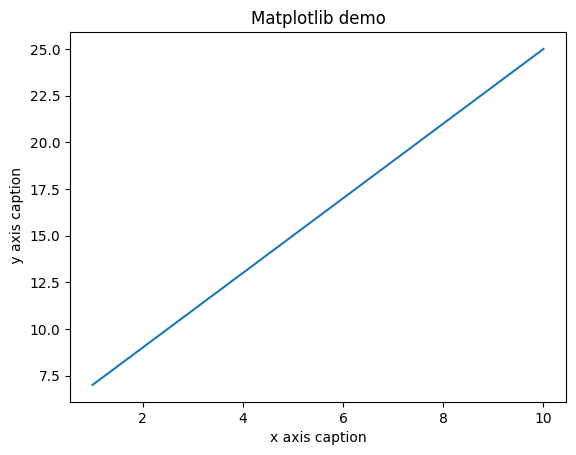

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x = np.arange(1,11)
y = 2*x + 5
plt.title("Matplotlib demo")
plt.xlabel("x axis caption")
plt.ylabel(" y axis caption")
plt.plot(x,y)
plt.show()

/tmp/ipython-input-19-3173770448.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
/tmp/ipython-input-19-3173770448.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


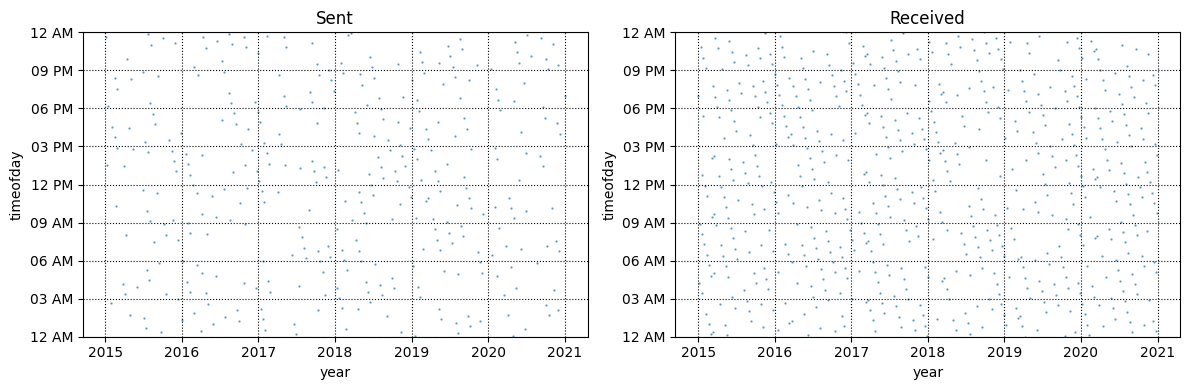

/tmp/ipython-input-19-3173770448.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sdw = sent.groupby('dayofweek').size() / len(sent)
/tmp/ipython-input-19-3173770448.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rdw = received.groupby('dayofweek').size() / len(received)


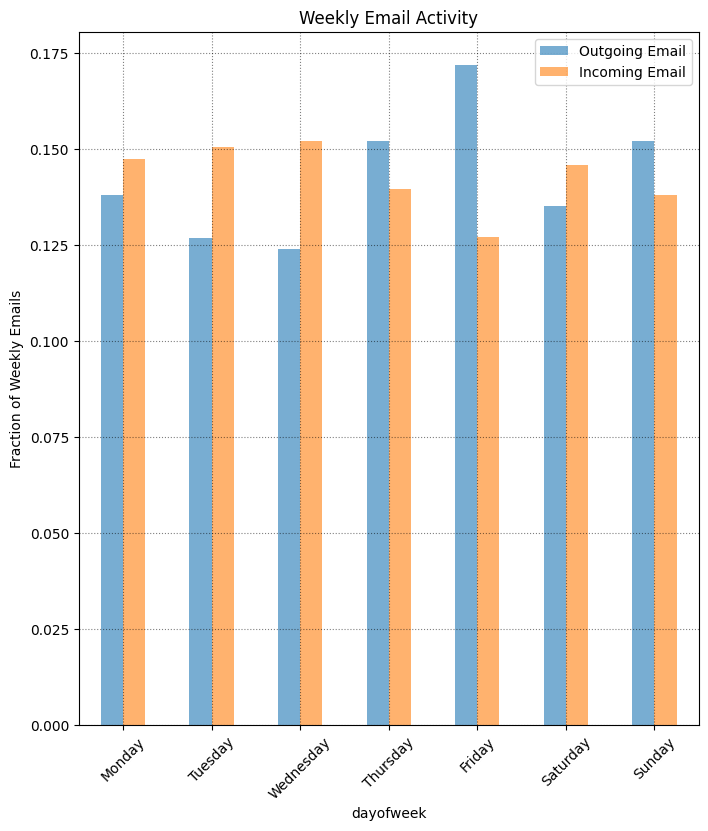

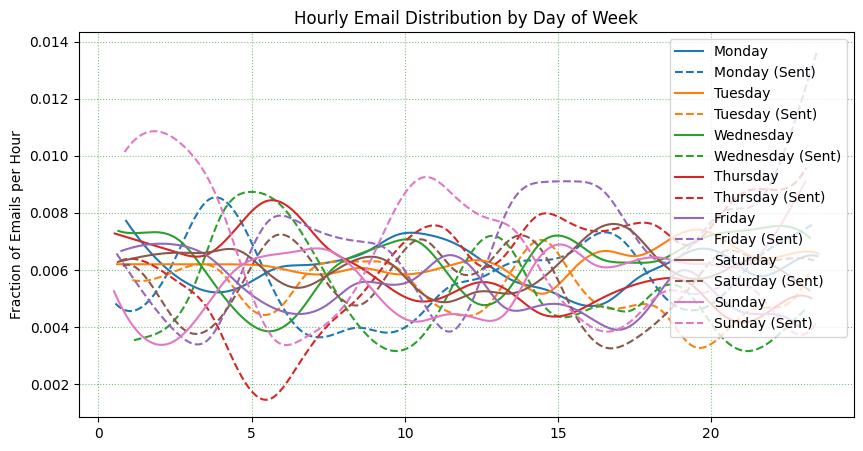

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from scipy.ndimage import gaussian_filter
from scipy.interpolate import interp1d
import datetime
import pytz
np.random.seed(42)
num_emails = 1000
dates = pd.date_range(start='2015-01-01', end='2020-12-31', periods=num_emails)
senders = np.random.choice(['itsmeskm99@gmail.com', 'friend@example.com', 'newsletter@site.com'], size=num_emails)
labels = ['sent' if sender == 'itsmeskm99@gmail.com' else 'inbox' for sender in senders]

data = pd.DataFrame({
    'from': senders,
    'date': dates,
    'label': labels
})

data['date'] = data['date'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
data['dayofweek'] = pd.Categorical(data['date'].dt.day_name(),
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                   ordered=True)
data['timeofday'] = data['date'].dt.hour + data['date'].dt.minute / 60 + data['date'].dt.second / 3600
data['hour'] = data['date'].dt.hour
data['year'] = data['date'].dt.year + data['date'].dt.dayofyear / 365.25
data.index = data['date']
del data['date']

sent = data[data['label'] == 'sent']
received = data[data['label'] == 'inbox']

def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    df.plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                        for ts in ax.get_yticks()])
    ax.set_title(title)
    ax.grid(ls=':', color='k')
    return ax

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')
plt.tight_layout()
plt.show()
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)
df_tmp = pd.DataFrame({'Outgoing Email': sdw, 'Incoming Email': rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8, 9), alpha=0.6)
plt.ylabel('Fraction of Weekly Emails')
plt.grid(ls=':', color='k', alpha=0.5)
plt.title("Weekly Email Activity")
plt.show()

def plot_hourly_distribution(df, ax, label=None, dt=1, smooth=True, color='C0', linestyle='-', weight_fun=None):
    tod = df['timeofday'].values
    year_range = data['year'].max() - data['year'].min()
    bins = int(24 / dt)
    weights = weight_fun(df) if weight_fun else np.ones_like(tod) / len(tod)

    hst, xedges = np.histogram(tod, bins=bins, weights=weights)
    x = np.delete(xedges, -1) + 0.5 * dt

    if smooth:
        hst = gaussian_filter(hst, sigma=1)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 1000)
        hst = f(x)

    ax.plot(x, hst, label=label, color=color, linestyle=linestyle)

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)

for i, dow in enumerate(data['dayofweek'].cat.categories):
    r_dow = received[received['dayofweek'] == dow]
    s_dow = sent[sent['dayofweek'] == dow]
    w_r = lambda x: np.ones(len(x)) / len(received)
    w_s = lambda x: np.ones(len(x)) / len(sent)
    plot_hourly_distribution(r_dow, ax, label=dow, color=f'C{i}', weight_fun=w_r)
    plot_hourly_distribution(s_dow, ax, label=f'{dow} (Sent)', linestyle='--', color=f'C{i}', weight_fun=w_s)

ax.set_ylabel('Fraction of Emails per Hour')
ax.set_title("Hourly Email Distribution by Day of Week")
ax.legend(loc='upper right')
plt.grid(ls=':', color='g', alpha=0.5)
plt.show()


<Axes: xlabel='Name'>

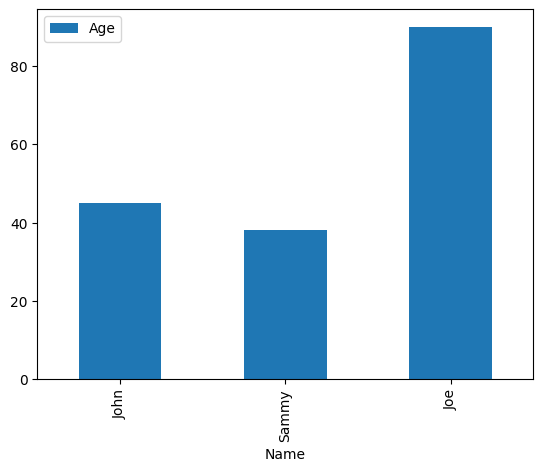

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({'Name':['John','Sammy','Joe'],'Age':[45,38,90]})
df.plot(x= "Name",y = "Age",kind = "bar")

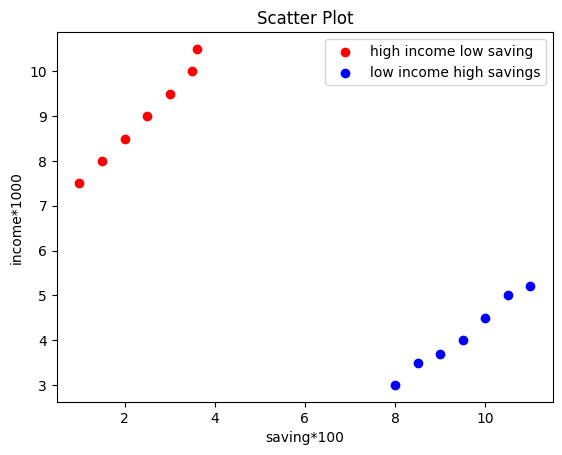

In [ ]:
import matplotlib.pyplot as plt
x = [1,1.5,2,2.5,3,3.5,3.6]
y = [7.5,8,8.5,9,9.5,10,10.5]
x1=[8,8.5,9,9.5,10,10.5,11]
y1=[3,3.5,3.7,4,4.5,5,5.2]
plt.scatter(x,y, label='high income low saving',color='r')
plt.scatter(x1,y1,label='low income high savings',color='b')
plt.xlabel('saving*100')
plt.ylabel('income*1000')
plt.title('Scatter Plot')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.random.randn(5,3),index=['a','c','e','f','h'],columns=['one','two','three'])
df=df.reindex(['a','b','c','d','e','f','g','h'])
print (df['one'].isnull())

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool


In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.random.randn(5,3),index=['a','c','e','f','h'],columns=['one','two','three'])
df=df.reindex(['a','b','c','d','e','f','g','h'])
print(df)

        one       two     three
a -2.052505  1.092044 -0.101627
b       NaN       NaN       NaN
c  1.584905 -0.316737 -1.066054
d       NaN       NaN       NaN
e -2.270151 -0.359194  0.585767
f  0.710469 -0.227246 -0.436733
g       NaN       NaN       NaN
h -1.247730  0.947559 -1.658791


In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.random.randn(5,3),index=['a','c','e','f','h'],columns=['one','two','three'])
df=df.reindex(['a','b','c','d','e','f','g','h'])
print(df.dropna())

        one       two     three
a  0.055847 -0.535608 -0.485194
c -1.543551 -0.008896  0.575617
e -0.143527 -0.598441 -0.839762
f  0.687541 -1.495360 -0.760159
h -1.331960 -1.063603 -0.258106


In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.random.randn(3,3),index=['a','c','e'],columns=['one','two','three'])
df=df.reindex(['a','b','c'])
print(df)
print("NaN replaced with '0':")
print(df.fillna(0))

        one       two     three
a -0.574574 -0.352443 -0.737973
b       NaN       NaN       NaN
c -1.263472  1.550863  1.981379
NaN replaced with '0':
        one       two     three
a -0.574574 -0.352443 -0.737973
b  0.000000  0.000000  0.000000
c -1.263472  1.550863  1.981379


In [ ]:
import numpy as np
import pandas as pd
df=pd.DataFrame({'one':[10,20,30,40,50,2000],'two':[1000,0,30,40,50,60]})
print(df.replace({1000:10,2000:60}))

   one  two
0   10   10
1   20    0
2   30   30
3   40   40
4   50   50
5   60   60


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
parse_dates=['date'])
df.head()
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


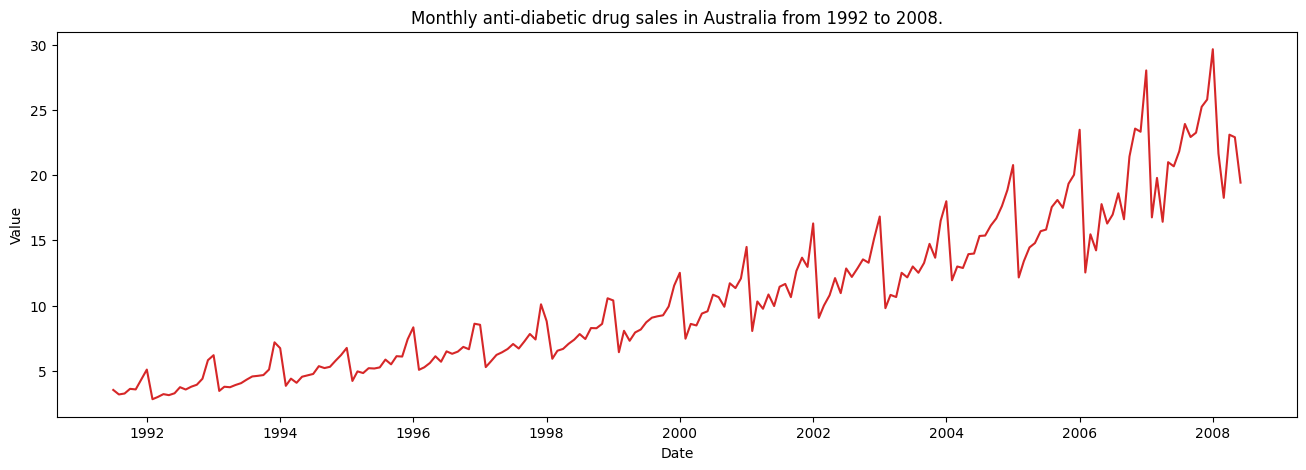

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],index_col='date')
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')


In [ ]:
pip install pandas folium


In [ ]:
import folium
import pandas as pd

# Load your dataset (make sure 'lat' and 'lon' columns exist)
data = pd.read_csv("your_data.csv")

# Create a map centered on a specific location (e.g., Portland)
m = folium.Map(location=[45.523, -122.675], zoom_start=13)

# Group data by coordinates and count the number of occurrences
location_data = data.groupby(['lat', 'lon']).size().reset_index(name='count')

# Add markers with popups and tooltips (hover effect)
for i in range(len(location_data)):
    lat = location_data.iloc[i]['lat']
    lon = location_data.iloc[i]['lon']
    count = location_data.iloc[i]['count']

    folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(f"<b>Count:</b> {count}", max_width=200),
        tooltip="Hover for count info",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Optional: Add a layer control (useful if layers/groups are added)
folium.LayerControl().add_to(m)

# Display the map in Google Colab
m


In [ ]:
import folium
import pandas as pd
from google.colab import files
import json
from IPython.display import IFrame

# Step 1: Upload CSV file
print("Upload your CSV file (e.g., indiadata.csv):")
uploaded_csv = files.upload()
csv_filename = next(iter(uploaded_csv))

# Step 2: Upload GeoJSON file
print("Upload your GeoJSON file (e.g., india_map_unlabelled.geojson):")
uploaded_geojson = files.upload()
geojson_filename = next(iter(uploaded_geojson))

# Step 3: Inspect GeoJSON properties (optional, can comment out after confirming)
with open(geojson_filename) as f:
    gj = json.load(f)
print("Properties of first feature in GeoJSON:")
print(gj['features'][0]['properties'])

# Step 4: Load CSV data
data = pd.read_csv(csv_filename)

# Step 5: Create Folium map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Step 6: Add choropleth layer using the correct key_on ('name' per your GeoJSON)
folium.Choropleth(
    geo_data=geojson_filename,
    name='choropleth',
    data=data,
    columns=['State', 'Value'],
    key_on='feature.properties.name',  # <-- must match GeoJSON property exactly
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population"
).add_to(m)

# Step 7: Save map to HTML file
m.save("india_map.html")
print("Map saved to india_map.html")

# Step 8: Display map inline in Colab
IFrame('india_map.html', width=800, height=600)


Upload your CSV file (e.g., indiadata.csv):


Saving indiadata.csv to indiadata (4).csv
Upload your GeoJSON file (e.g., india_map_unlabelled.geojson):


Saving india_map_unlabelled.geojson to india_map_unlabelled (4).geojson
Properties of first feature in GeoJSON:
{'id': 31, 'abbr': 'DD', 'name': 'Dadra and Nagar Haveli & Daman and Diu'}
Map saved to india_map.html


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


--2025-07-24 06:56:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [  <=>               ]  82.23K   213KB/s    in 0.4s    

2025-07-24 06:56:45 (213 KB/s) - ‘winequality-red.csv’ saved [84199]



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

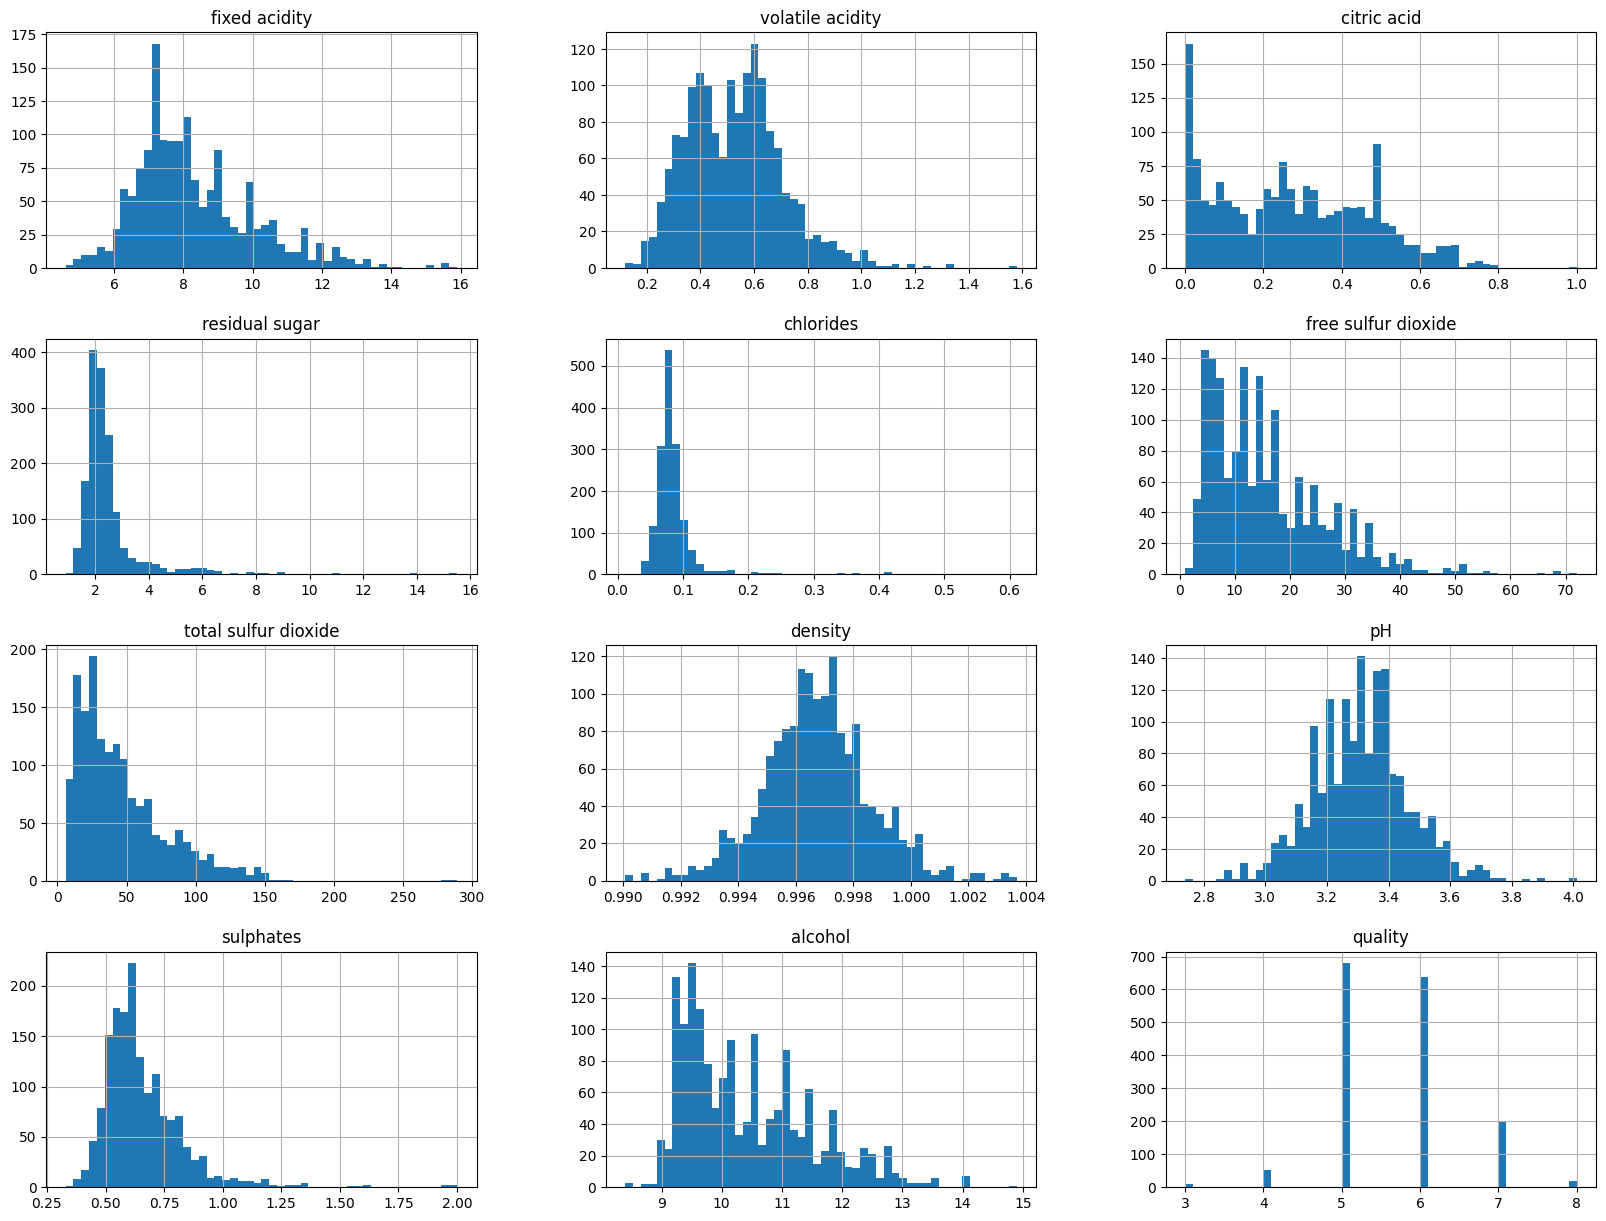

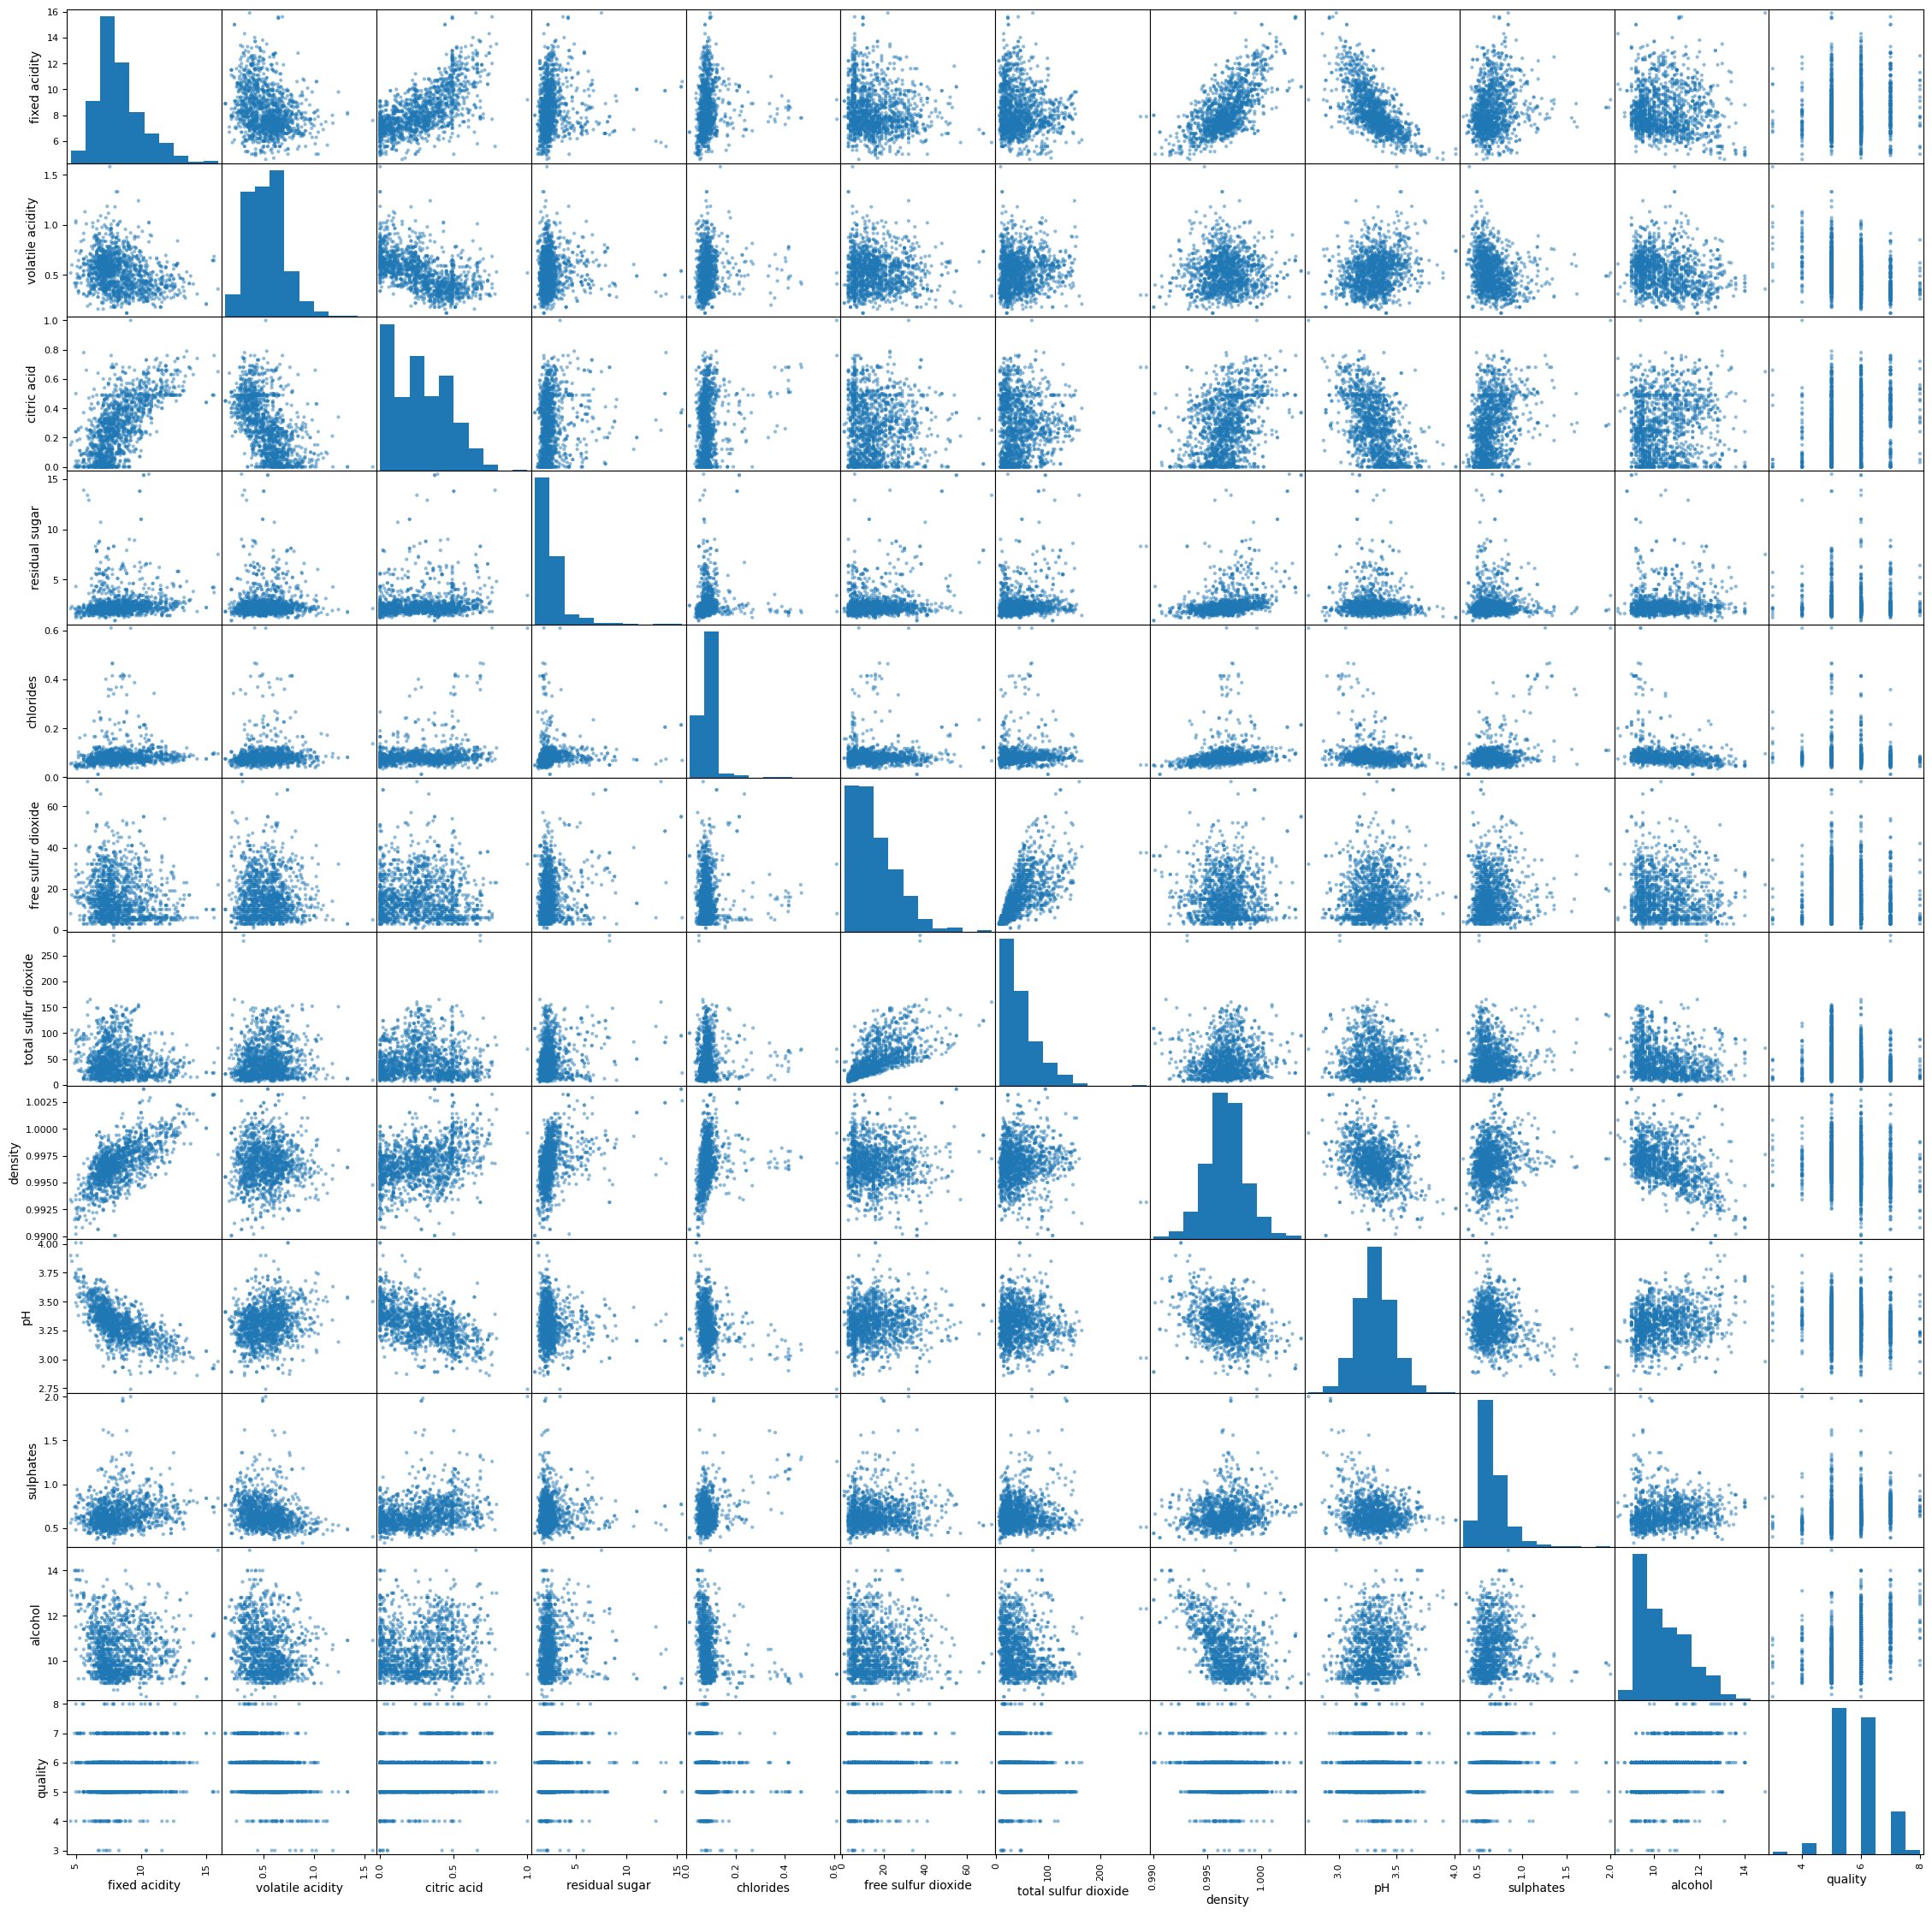

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the wine quality dataset
data = pd.read_csv('winequality-red.csv', delimiter=';')  # Added '=' and fixed quotes and delimiter

# Print the first 5 rows of the data
print(data.head())

# Print summary statistics of the data
print(data.describe())

# Create histograms to visualize the distribution of each feature
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Create a scatter matrix to visualize the relationship between features
pd.plotting.scatter_matrix(data, figsize=(28, 28))  # Fixed assignment of figsize
plt.show()


In [ ]:
!pip install radar faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.3 MB/s eta 0:00:00


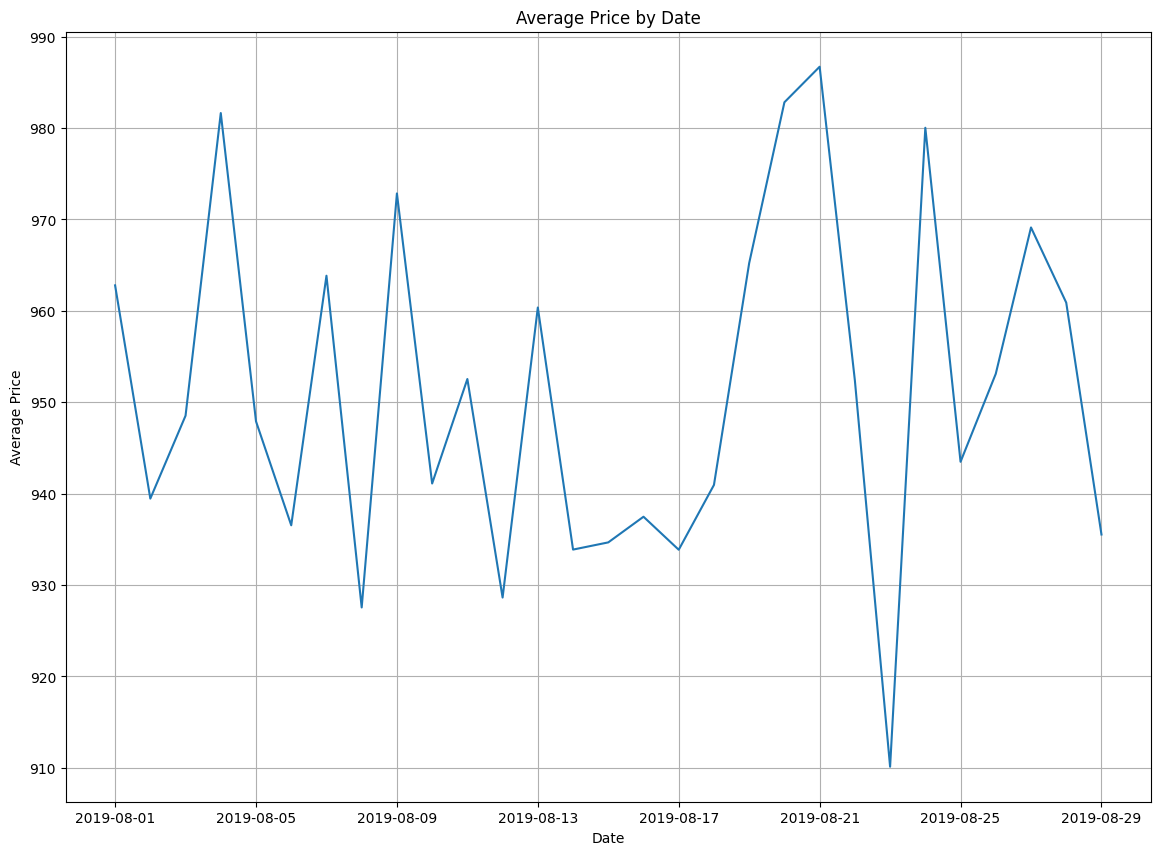

In [ ]:
import datetime
import random
import pandas as pd
import radar
from faker import Faker
import matplotlib.pyplot as plt

fake = Faker()

def generateData(n):
    listdata = []
    for _ in range(n):
        # Generate random date between Aug 1, 2019 and Aug 30, 2019
        date = radar.random_datetime(start='2019-08-01', stop='2019-08-30').strftime("%Y-%m-%d")
        # Generate random price between 900 and 1000
        price = round(random.uniform(900, 1000), 4)
        listdata.append([date, price])

    # Create DataFrame
    df = pd.DataFrame(listdata, columns=['Date', 'Price'])

    # Convert 'Date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

    # Group by date and compute mean price
    df = df.groupby('Date').mean()

    return df

# Generate 100 random data points
df = generateData(100)

# Plotting
plt.rcParams['figure.figsize'] = (14, 10)
plt.plot(df.index, df['Price'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price by Date')
plt.grid(True)
plt.show()


In [ ]:
!pip install matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Sample SQL JOIN/GroupBy Result:
      type         country  show_count
0    Movie   United States        1822
1    Movie           India         868
2    Movie  United Kingdom         164
3  TV Show   United States          27
4  TV Show  United Kingdom          19
5  TV Show           India           7


/tmp/ipython-input-8-2070228150.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


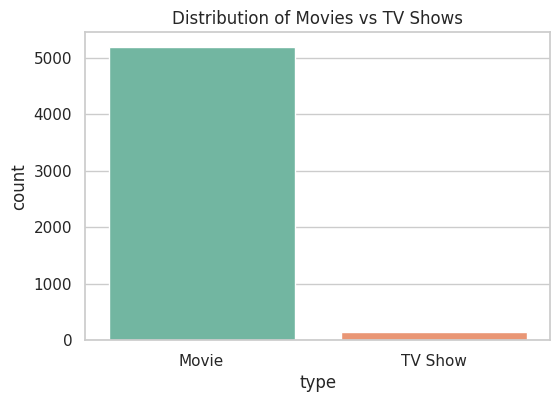

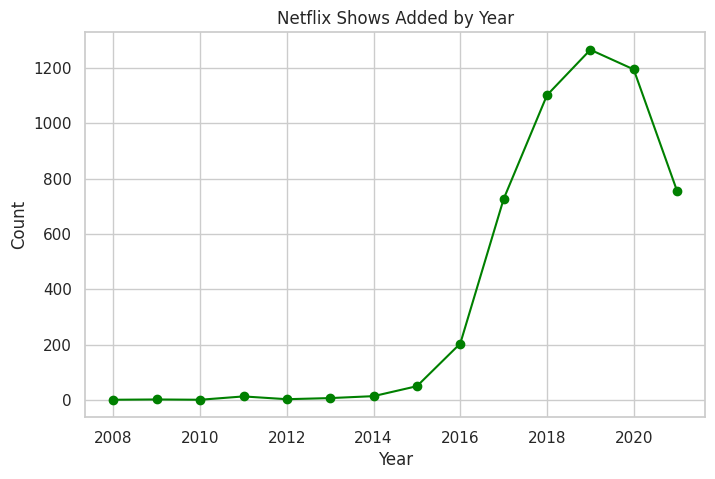

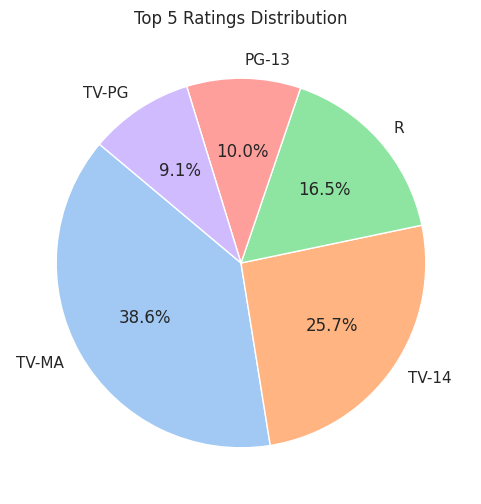

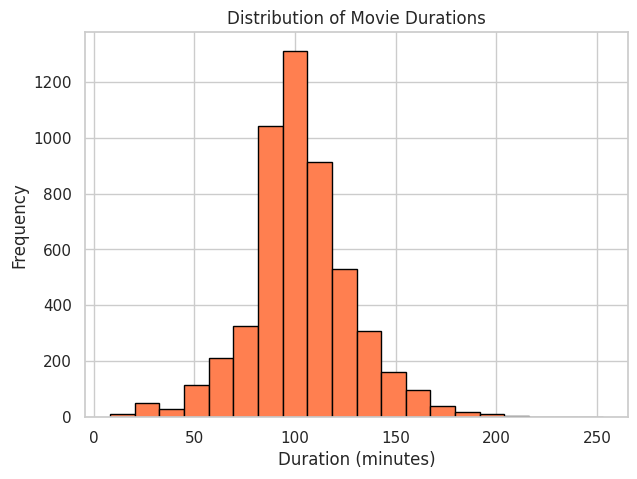

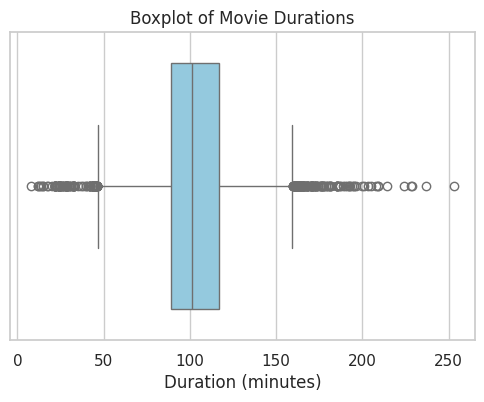

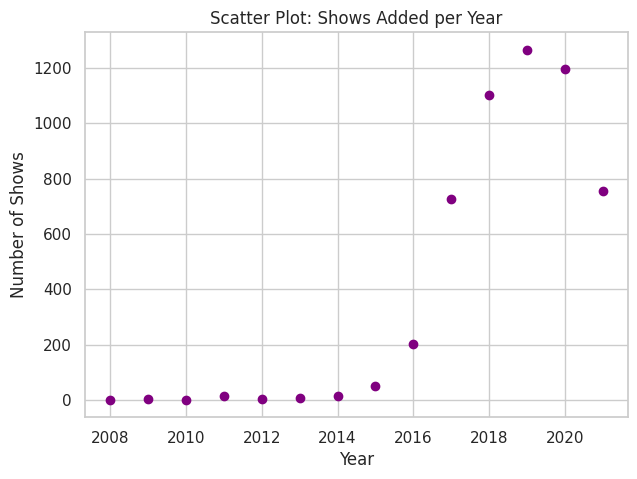

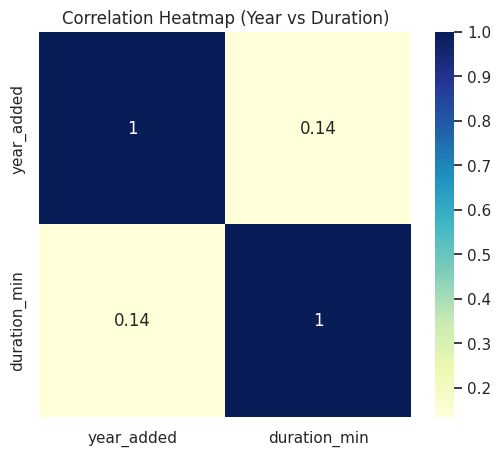

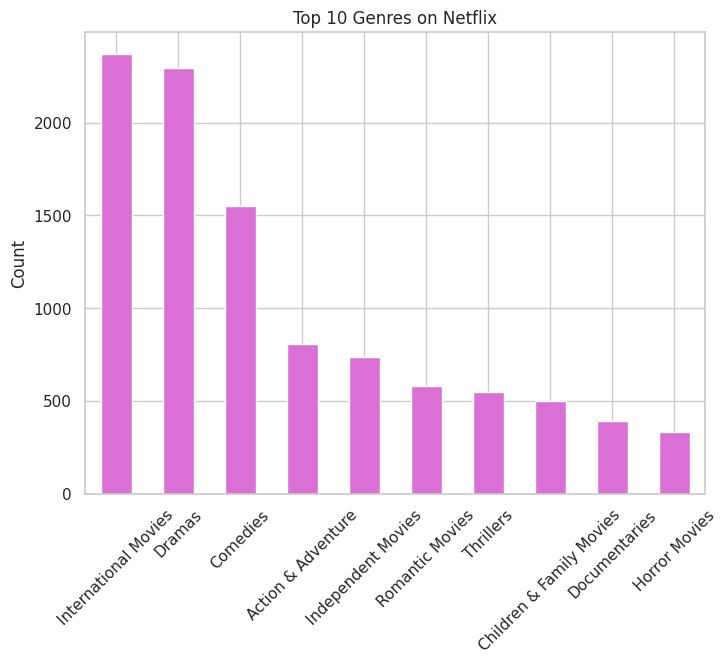

In [ ]:
# Install required packages
!pip install -q matplotlib seaborn

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from collections import Counter

# 2. Load dataset (upload netflix_titles.csv first)
df = pd.read_csv('netflix_titles.csv')

# 3. Data Cleaning
df.dropna(subset=['director', 'cast', 'country', 'date_added'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# 4. SQL-style Table Splitting and JOIN Simulation
# Shows Table
shows = df[['show_id', 'type', 'title', 'rating', 'duration']]
# Genres Table
genres = df[['show_id', 'listed_in']].rename(columns={'listed_in': 'genres'})
# Country Table
countries = df[['show_id', 'country']]

# JOIN (like SQL)
joined = shows.merge(genres, on='show_id').merge(countries, on='show_id')

# 5. SQLite: Save and Run SQL Queries
conn = sqlite3.connect('netflix.db')
df.to_sql('netflix', conn, if_exists='replace', index=False)

# Sample SQL JOIN Query
query = """
SELECT type, country, COUNT(*) AS show_count
FROM netflix
WHERE country IN ('India', 'United States', 'United Kingdom')
GROUP BY type, country
ORDER BY show_count DESC;
"""
sql_result = pd.read_sql(query, conn)
print("Sample SQL JOIN/GroupBy Result:")
print(sql_result)

# 6. Visualization Setup
sns.set(style="whitegrid")

# --- VISUALIZATIONS ---

# A. Bar Chart: Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Movies vs TV Shows")
plt.show()

# B. Line Plot: Shows Added Over Years
plt.figure(figsize=(8,5))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title("Netflix Shows Added by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# C. Pie Chart: Distribution by Rating
plt.figure(figsize=(6,6))
df['rating'].value_counts().head(5).plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Top 5 Ratings Distribution")
plt.ylabel('')
plt.show()

# D. Histogram: Show duration (movies only)
movie_durations = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').dropna().astype(int)
plt.figure(figsize=(7,5))
plt.hist(movie_durations[0], bins=20, color='coral', edgecolor='black')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# E. Box Plot: Duration Distribution for Movies
plt.figure(figsize=(6,4))
sns.boxplot(x=movie_durations[0], color='skyblue')
plt.title("Boxplot of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()

# F. Scatter Plot: Year vs Number of Shows
yearly_counts = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(7,5))
plt.scatter(yearly_counts.index, yearly_counts.values, color='purple')
plt.title("Scatter Plot: Shows Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.grid(True)
plt.show()

# G. Heatmap: Correlation Matrix (for demo)
# We'll simulate numeric features
df_numeric = pd.DataFrame({
    'year_added': df['year_added'],
    'duration_min': pd.to_numeric(df[df['type']=='Movie']['duration'].str.extract('(\d+)')[0], errors='coerce')
})
df_numeric.dropna(inplace=True)
corr_matrix = df_numeric.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap (Year vs Duration)")
plt.show()

# H. Top 10 Genres - Bar Chart
plt.figure(figsize=(8,6))
genre_series = df['listed_in'].dropna().str.split(', ')
genres_flat = [genre for sublist in genre_series for genre in sublist]
top_genres = pd.Series(Counter(genres_flat)).sort_values(ascending=False).head(10)
top_genres.plot(kind='bar', color='orchid')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
